In [162]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

In [163]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/pok/Pokemon.csv')
dff = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/pok/Pokemon.csv')

df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [164]:
dff=dff.astype({'Legendary':'str'})

In [165]:
dd= df.corr()
df.info()

cols = dd.columns
cols
#Name index
#Type 1, Type 2,Generation 삭제 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Index(['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')

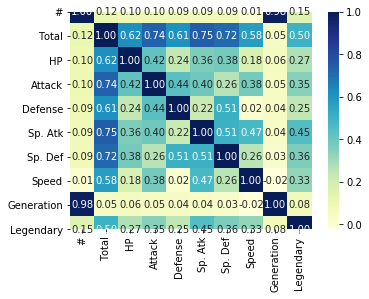

In [166]:
sns.heatmap(dd.values,
            cbar = True,
           annot=True, 
            cmap="YlGnBu",
            square=True, 
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols
           )

#### 전처리 -------------

In [167]:
def preprocessing():
    #drop
    df.drop(columns=["Type 1", "Type 2","Generation","#"], inplace=True)
    
    #setIndex
    df.set_index("Name", inplace=True)
    
    #LabelEncoder
    le=LabelEncoder()
    le.fit(df['Legendary'].unique())
    print("라벨링한 목록:", le.classes_)
    df['Legendary']=le.transform(df['Legendary']) #1이 True

In [168]:
preprocessing()

라벨링한 목록: [False  True]


In [169]:
df2=df.copy()

In [170]:
df2_test=df2.drop(columns=['Legendary'])

In [171]:
df2_test

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,
Bulbasaur,318,45,49,49,65,65,45
Ivysaur,405,60,62,63,80,80,60
Venusaur,525,80,82,83,100,100,80
VenusaurMega Venusaur,625,80,100,123,122,120,80
Charmander,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
Diancie,600,50,100,150,100,150,50
DiancieMega Diancie,700,50,160,110,160,110,110
HoopaHoopa Confined,600,80,110,60,150,130,70


In [172]:
X_train, X_test, y_train, y_test=train_test_split(df2_test, df2['Legendary'], test_size=0.4, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 7), (320, 7), (480,), (320,))

In [173]:
df_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
svc_clf=SVC()
how=[df_clf, rf_clf, svc_clf]

In [174]:
for h in how:
    h.fit(X_train, y_train)
    com_target=h.predict(X_test)
    print("정확도", accuracy_score(y_test, com_target))

정확도 0.93125
정확도 0.91875
정확도 0.8875


In [175]:
def fold2(df2_test,df2, nsplit, clf):
    acc=[]
    kfold=KFold(n_splits=nsplit)
    for i, (train_index, test_index) in enumerate(kfold.split(df)):
        X_train= df2_test.values[train_index]
        y_train= df2['Legendary'].values[train_index]
        X_test= df2_test.values[test_index]
        y_test= df2['Legendary'].values[test_index]
        clf.fit(X_train, y_train)
#         print(clf.feature_importances_)
        com_target=clf.predict(X_test)
        acc.append(accuracy_score(y_test, com_target))
        print("정확도", accuracy_score(y_test, com_target))
    print("평균 정확도 : ", np.mean(acc))
    plt.xlabel('kfold   n_splits')
    plt.ylabel('accuracy_score')
    plt.plot(acc, label=a[: a.find("(")])
    plt.legend()
    return acc

-------------------------------------DecisionTreeClassifier---------------------------------
정확도 0.975
정확도 0.975
정확도 0.9875
정확도 0.9375
정확도 0.9875
정확도 0.8625
정확도 0.875
정확도 1.0
정확도 0.925
정확도 0.95
평균 정확도 :  0.9475
-------------------------------------RandomForestClassifier---------------------------------
정확도 0.975
정확도 0.9625
정확도 0.975
정확도 0.975
정확도 0.9875
정확도 0.8625
정확도 0.8875
정확도 1.0
정확도 0.875
정확도 0.9625
평균 정확도 :  0.94625
-------------------------------------SVC---------------------------------
정확도 1.0
정확도 0.9625
정확도 0.95
정확도 0.925
정확도 1.0
정확도 0.775
정확도 0.825
정확도 1.0
정확도 0.825
정확도 0.9
평균 정확도 :  0.91625
------------------------------------------------------------------------------------------------------------------
제일 정확도가 높은 모델은 DecisionTreeClassifier 이고, 평균 정확도는 0.9475 입니다.
------------------------------------------------------------------------------------------------------------------


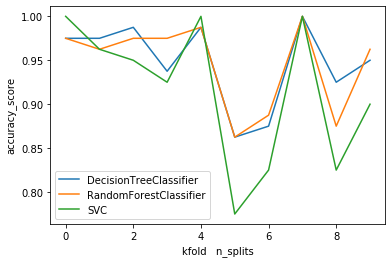

In [176]:
how=[df_clf, rf_clf, svc_clf]
mean=[]
m=[]
for h in how:
    a=str(h)
    print("-------------------------------------"+a[: a.find("(")]+"---------------------------------")
    value=fold2(df2_test,df2,10, h)
    mean.append(value)
    m.append(np.mean(value))

print("------------------------------------------------------------------------------------------------------------------")
gg=str(how[m.index(max(m))])
print("제일 정확도가 높은 모델은",gg[: gg.find("(")],"이고, 평균 정확도는",max(m), "입니다." )
print("------------------------------------------------------------------------------------------------------------------")

In [177]:
model_list2 = [] 
max_depth = [3, 5, 10, 15]
hyper_para = { # 5 * 4* 10 => 200번의 검증을 함.!
    'maxdepth' : [3, 5, 10, 15, 20],
    'random_state' : [1, 10, 100, 200]
}
for x in max_depth:
    df_clf = DecisionTreeClassifier(max_depth= x, random_state=12)
    model_list2.append(df_clf)
rf_clf = RandomForestClassifier(random_state=11)
model_list2.append(rf_clf)
svc_clf = SVC()
model_list2.append(svc_clf)

In [178]:
model_list2

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=12, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=12, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0

-------------------------------------DecisionTreeClassifier---------------------------------
정확도 0.9875
정확도 0.95
정확도 0.95
정확도 0.9375
정확도 0.9875
정확도 0.875
정확도 0.9
정확도 1.0
정확도 0.925
정확도 0.95
평균 정확도 :  0.94625
-------------------------------------DecisionTreeClassifier---------------------------------
정확도 0.975
정확도 0.9625
정확도 1.0
정확도 0.925
정확도 0.9875
정확도 0.8625
정확도 0.9
정확도 1.0
정확도 0.9
정확도 0.9625
평균 정확도 :  0.9475
-------------------------------------DecisionTreeClassifier---------------------------------
정확도 0.975
정확도 0.975
정확도 0.9875
정확도 0.9375
정확도 0.975
정확도 0.8625
정확도 0.875
정확도 1.0
정확도 0.9
정확도 0.9625
평균 정확도 :  0.9450000000000001
-------------------------------------DecisionTreeClassifier---------------------------------
정확도 0.975
정확도 0.9875
정확도 0.9875
정확도 0.9375
정확도 0.975
정확도 0.875
정확도 0.875
정확도 1.0
정확도 0.9
정확도 0.9625
평균 정확도 :  0.9475000000000001
-------------------------------------RandomForestClassifier---------------------------------
정확도 0.975
정확도 0.9625
정확도 0.975
정확도 0.975
정확도 0.987

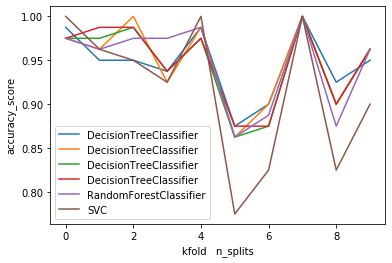

In [179]:
mean=[]
m=[]
for h in model_list2:
    a=str(h)
    print("-------------------------------------"+a[: a.find("(")]+"---------------------------------")
    value=fold2(df2_test,df2,10,h)
    mean.append(value)
    m.append(np.mean(value))

print("------------------------------------------------------------------------------------------------------------------")
gg=str(model_list2[m.index(max(m))])
print("제일 정확도가 높은 모델은",gg[: gg.find("(")],"이고, 평균 정확도는",max(m), "입니다." )
print("------------------------------------------------------------------------------------------------------------------")

In [180]:
!pip install graphviz

In [181]:
export_graphviz(df_clf,out_file = "pocket_tree.dot",feature_names=["Total","HP","Attack","Defense","Sp. Atk", "Sp. Def", "Speed"], class_names = dff['Legendary'].unique())

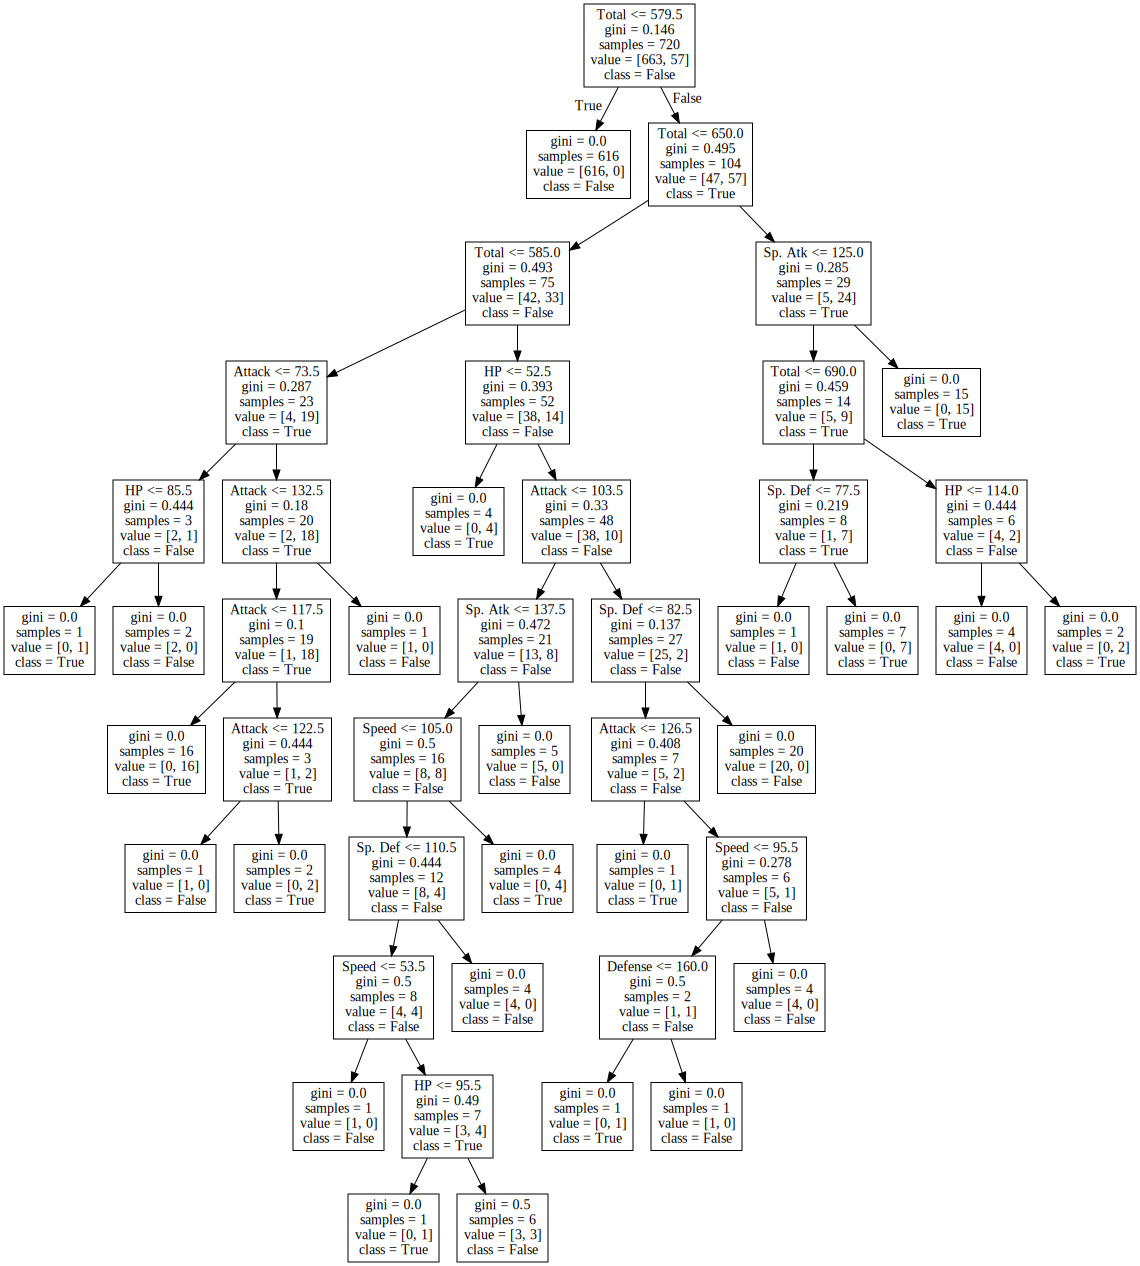

In [182]:
aa='pocket_tree'
with open(aa+".dot") as f2:
    dot_graph2 = f2.read()

dot2 = graphviz.Source(dot_graph2)
dot2.format = 'png'
dot2.render(filename=aa , directory='.', cleanup=True)
dot2